In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
dataset=pd.read_csv('Day.csv')

In [3]:
X=dataset.iloc[:,1:5]
X.head()

,Outlook,Temperature,Humidity,Wind
0,Sunny,Hot,High,False
1,Sunny,Hot,High,True
2,Overcast,Hot,High,False
3,Rain,Mild,High,False
4,Rain,Cool,Normal,False


In [4]:
Y=dataset.iloc[:,-1]
Y.head()
#Y=Y.apply(le.fit_transform)
#Y.head()

0     No
1     No
2    Yes
3    Yes
4    Yes
Name: Class: Play Ball, dtype: object

In [5]:
le=preprocessing.LabelEncoder()
X=X.apply(le.fit_transform)
X.head()

,Outlook,Temperature,Humidity,Wind
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0


In [9]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=1) 
X_train.head()
X_test.head()

,Outlook,Temperature,Humidity,Wind
3,1,2,0,0
7,2,2,0,0
6,0,0,1,1
2,0,1,0,0
10,2,2,1,1


In [ ]:
##### USING GINI INDEX

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


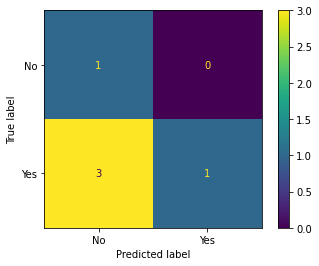

In [10]:
DT=DecisionTreeClassifier(criterion="gini")
DT.fit(X_train,Y_train)
Y_pred=DT.predict(X_test)
acc_NB=round(DT.score(X_train,Y_train)*100,2)
plot_confusion_matrix(DT,X_test,Y_test)

[Text(0.5, 0.8333333333333334, 'X[2] <= 0.5\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.25, 0.5, 'X[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.5, 'X[3] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

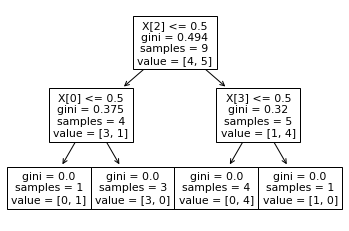

In [11]:
tree.plot_tree(DT)

In [12]:
print(classification_report(Y_test,Y_pred,labels=['No','Yes']))

              precision    recall  f1-score   support

          No       0.25      1.00      0.40         1
         Yes       1.00      0.25      0.40         4

    accuracy                           0.40         5
   macro avg       0.62      0.62      0.40         5
weighted avg       0.85      0.40      0.40         5



In [ ]:
#####USING ENTROPY

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


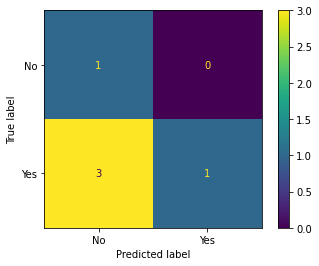

In [13]:
DT=DecisionTreeClassifier(criterion="entropy")
DT.fit(X_train,Y_train)
Y_pred=DT.predict(X_test)
acc_NB=round(DT.score(X_train,Y_train)*100,2)
plot_confusion_matrix(DT,X_test,Y_test)

[Text(0.5, 0.8333333333333334, 'X[3] <= 0.5\nentropy = 0.991\nsamples = 9\nvalue = [4, 5]'),
 Text(0.25, 0.5, 'X[2] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.75, 0.5, 'X[0] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]')]

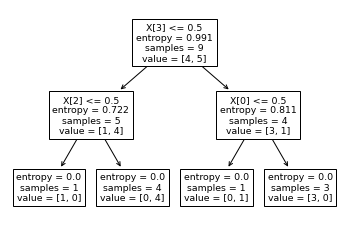

In [14]:
tree.plot_tree(DT)

In [15]:
print(classification_report(Y_test,Y_pred,labels=['No','Yes']))

              precision    recall  f1-score   support

          No       0.25      1.00      0.40         1
         Yes       1.00      0.25      0.40         4

    accuracy                           0.40         5
   macro avg       0.62      0.62      0.40         5
weighted avg       0.85      0.40      0.40         5

